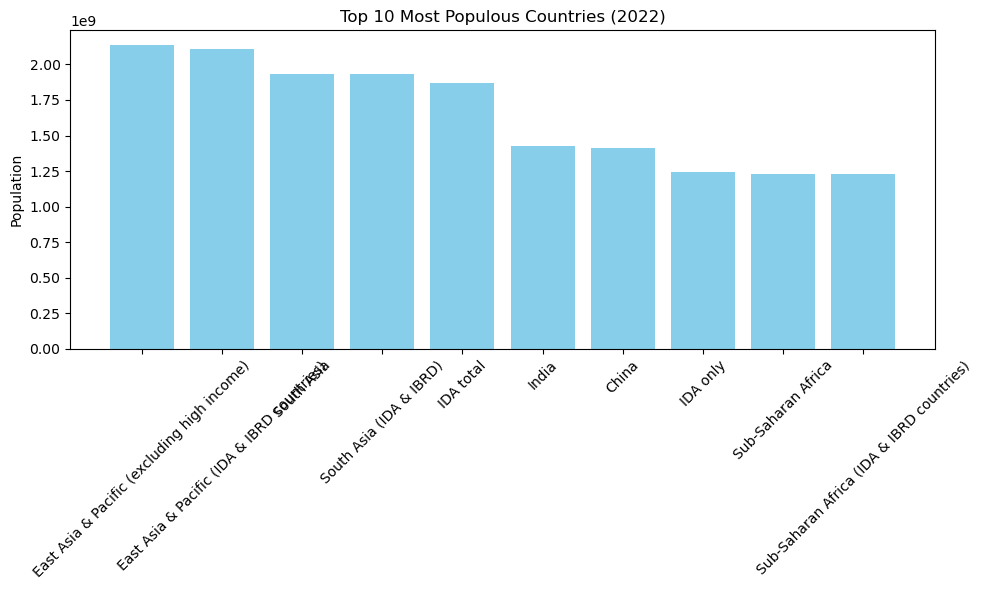

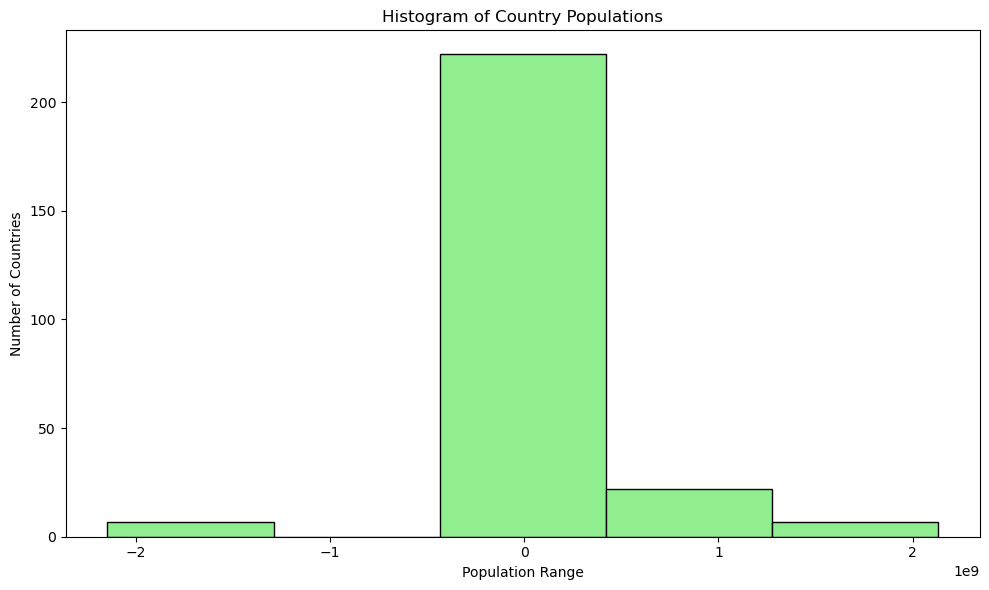

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Load and Clean the World Bank Data
# --------------------------------------

# Load the file (adjust path if needed)
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_2590.csv'

# Skip metadata rows (first 4 rows), load from row 5
df = pd.read_csv(file_path, skiprows=4)

# Display available columns (you can uncomment this to inspect)
# print(df.columns)

# Use the most recent year available — usually 2022 or 2021
year = '2022' if '2022' in df.columns else df.columns[-1]

# Create a clean DataFrame with just country and population
population_df = df[['Country Name', year]].dropna()
population_df.columns = ['Country', 'Population']

# Remove non-country entries like "World", "High income", etc.
# (You can improve this using the Metadata CSVs, but here's a simple filter)
remove_list = ['World', 'High income', 'Low income', 'Upper middle income',
               'Lower middle income', 'Euro area', 'OECD members']
population_df = population_df[~population_df['Country'].isin(remove_list)]

# Convert population to integers
population_df['Population'] = population_df['Population'].astype(int)

# Sort by Population
population_df = population_df.sort_values(by='Population', ascending=False)

# --------------------------------------
# 2. Bar Chart: Top 10 Most Populous
# --------------------------------------

top_10 = population_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['Population'], color='skyblue')
plt.title(f'Top 10 Most Populous Countries ({year})')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------
# 3. Histogram: Distribution of Populations
# --------------------------------------

plt.figure(figsize=(10, 6))
plt.hist(population_df['Population'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of Country Populations')
plt.xlabel('Population Range')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()
